### Machine Learning

    Any Doubt in Linear Regression ? 

    What about your assignment submission ? 
    
    in chat share your git id's quickly i will check all git id's by tonight if i don't find assignment project there in tomorrow class those students will not be allowed am i clear ? 
    
    

In [3]:
!python boston_app/boston_app.py

...............loading model....................
..............sucessfully loaded.................
Price of house :  46.552478626054494


    Hackers log 

#### MPG

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi'] = 300

In [5]:
mpg = sns.load_dataset('mpg')

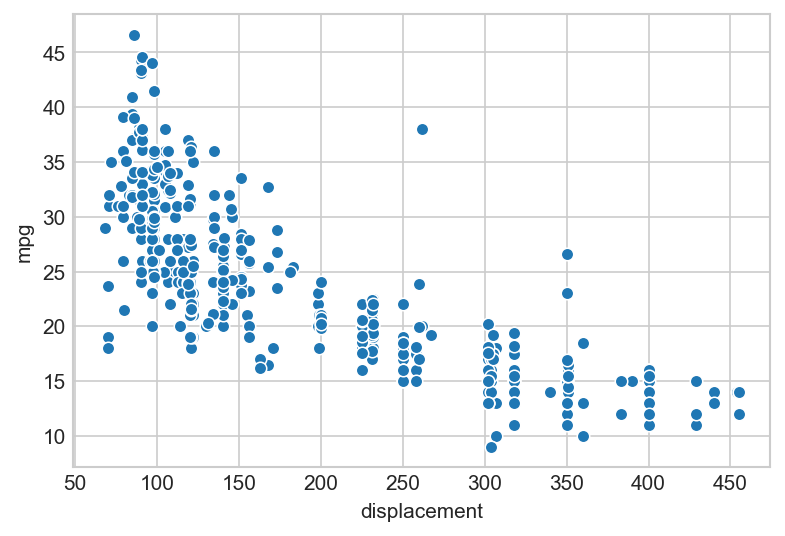

In [9]:
plt.figure(dpi=150)
sns.scatterplot(mpg['displacement'], mpg['mpg'])
plt.show()

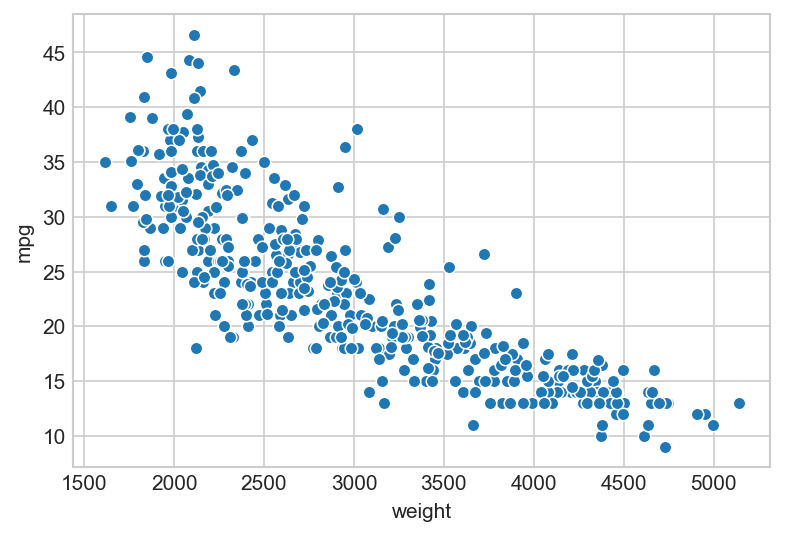

In [10]:
plt.figure(dpi=150)
sns.scatterplot(mpg['weight'], mpg['mpg'])
plt.show()

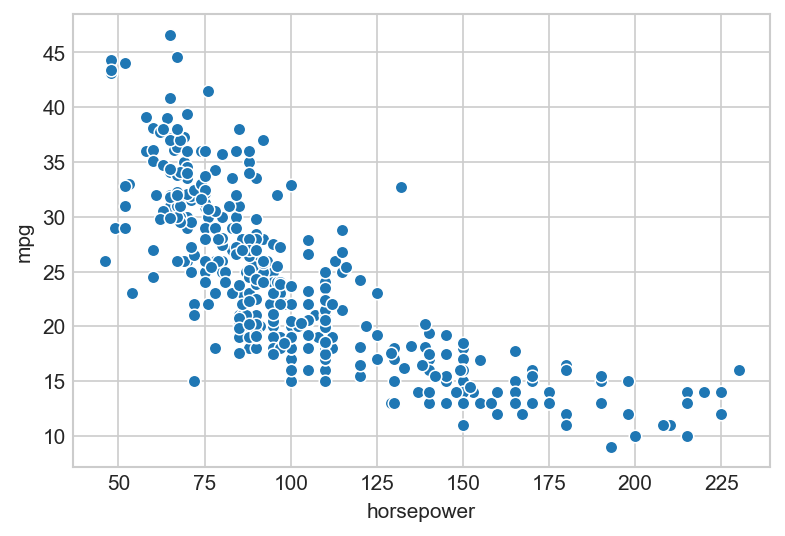

In [11]:
plt.figure(dpi=150)
sns.scatterplot(mpg['horsepower'], mpg['mpg'])
plt.show()

In [12]:
np.corrcoef(mpg['horsepower'], mpg['mpg'])

array([[nan, nan],
       [nan,  1.]])

In [13]:
mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [14]:
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

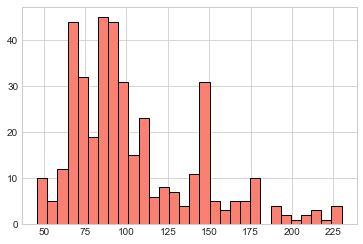

In [16]:
plt.hist(mpg['horsepower'], bins=30, ec='k', color='salmon')
plt.show()

In [22]:
mpg['horsepower'] = mpg['horsepower'].fillna(np.median(mpg['horsepower']))

In [23]:
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [28]:
mpg['horsepower'][mpg['horsepower'].isna()] = np.median(mpg['horsepower'])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
np.median(mpg['horsepower'].dropna() )

93.5

In [46]:
import warnings
warnings.filterwarnings(action='ignore')

In [47]:
mpg['horsepower'][mpg['horsepower'].isna()] = np.median(mpg['horsepower'].dropna() )

In [49]:
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

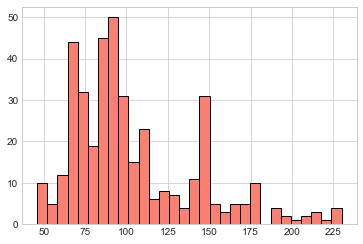

In [50]:
plt.hist(mpg['horsepower'], bins=30, ec='k', color='salmon')
plt.show()

In [52]:
features = mpg[['displacement', 'horsepower', 'weight']]

In [53]:
features.head()

,displacement,horsepower,weight
0,307.0,130.0,3504
1,350.0,165.0,3693
2,318.0,150.0,3436
3,304.0,150.0,3433
4,302.0,140.0,3449


In [54]:
target = mpg['mpg']

In [55]:
target.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
model = LinearRegression()

In [58]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(features[['displacement']], target)

In [62]:
X_train.head()

,displacement
334,70.0
137,350.0
352,98.0
249,260.0
29,97.0


In [63]:
y_train.head()

334    23.7
137    13.0
352    29.9
249    19.9
29     27.0
Name: mpg, dtype: float64

In [64]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
lin_pred = model.predict(X_test)

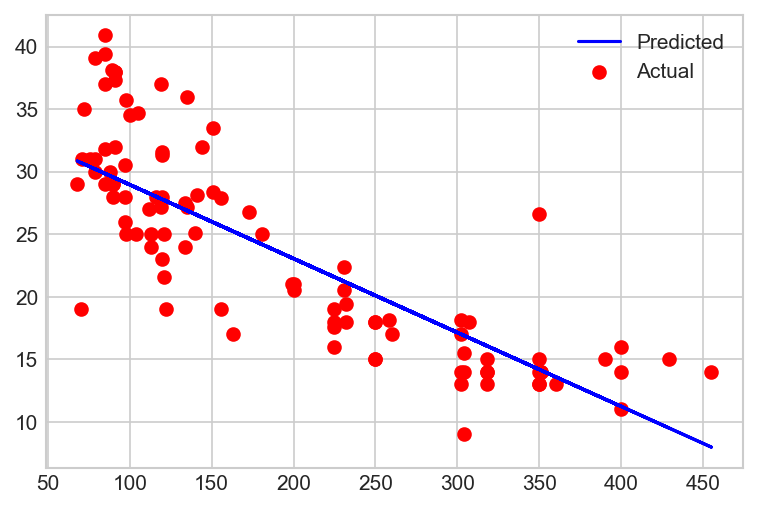

In [67]:
plt.figure(dpi=150)
plt.scatter(X_test, y_test, color='r', label='Actual')
plt.plot(X_test, lin_pred, color='b', label='Predicted')
plt.legend()
plt.show()

In [68]:
from sklearn.metrics import r2_score

In [70]:
print(f"Accuracy: {r2_score(y_test, lin_pred)*100:.2f}")


Accuracy: 68.23


In [71]:
train_pred = model.predict(X_train)
print(f"Accuracy: {r2_score(y_train, train_pred)*100:.2f}")


Accuracy: 63.27


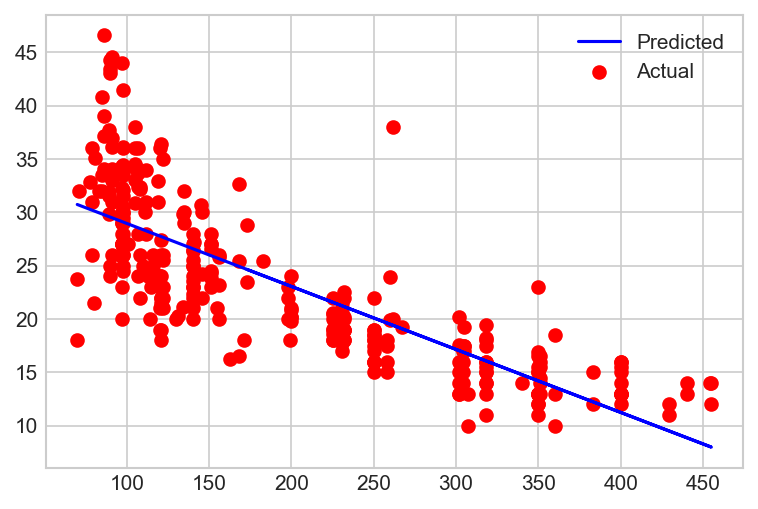

In [72]:
plt.figure(dpi=150)
plt.scatter(X_train, y_train, color='r', label='Actual')
plt.plot(X_train, train_pred, color='b', label='Predicted')
plt.legend()
plt.show()

In [74]:
features['displacement']

0      307.0
1      350.0
2      318.0
3      304.0
4      302.0
       ...  
393    140.0
394     97.0
395    135.0
396    120.0
397    119.0
Name: displacement, Length: 398, dtype: float64

In [75]:
from sklearn.preprocessing import PolynomialFeatures

In [76]:
p_features = PolynomialFeatures(degree=2)

`fit` -> only learns through given training data

`fit_transform` -> will learn from given training data as well as will return predictions

In [78]:
p_features.fit_transform(features[['displacement']])
# c + bx + ax**2

array([[1.00000e+00, 3.07000e+02, 9.42490e+04],
       [1.00000e+00, 3.50000e+02, 1.22500e+05],
       [1.00000e+00, 3.18000e+02, 1.01124e+05],
       ...,
       [1.00000e+00, 1.35000e+02, 1.82250e+04],
       [1.00000e+00, 1.20000e+02, 1.44000e+04],
       [1.00000e+00, 1.19000e+02, 1.41610e+04]])

In [81]:
X = features[['displacement']]

In [82]:
poly_2d = p_features.fit_transform(X)

In [84]:
poly_2d.shape # X -> x1, x2, x3

(398, 3)

In [87]:
m1 = LinearRegression() # linear
m2 = LinearRegression() # polynomial

In [88]:
xtrain, xtest, ytrain, ytest = train_test_split(X, target)
X_train, X_test, y_train, y_test = train_test_split(poly_2d, target)

In [90]:
m1.fit(xtrain, ytrain)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
m2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
pred1 = m1.predict(xtest)
pred2 = m2.predict(X_test)

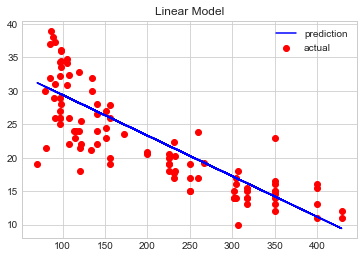

Accuracy : 67.00


In [100]:
plt.title('Linear Model')
plt.scatter(xtest, ytest, color='r', label='actual')
plt.plot(xtest, pred1, color='b', label='prediction')
plt.legend()
plt.show()
print(f"Accuracy : {r2_score(ytest, pred1)*100:.2f}")

In [102]:
X_test.shape

(100, 3)

In [103]:
y_test.shape

(100,)

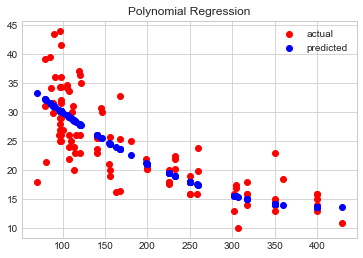

In [111]:
plt.title('Polynomial Regression')
plt.scatter(X_test[:, 1], y_test, color='r', label='actual')
plt.scatter(X_test[:, 1], pred2, color='b', label='predicted')
plt.legend()
plt.show()

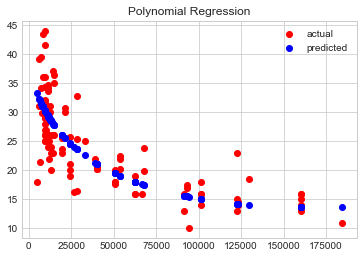

In [113]:
plt.title('Polynomial Regression')
plt.scatter(X_test[:, 2], y_test, color='r', label='actual')
plt.scatter(X_test[:, 2], pred2, color='b', label='predicted')
plt.legend()
plt.show()

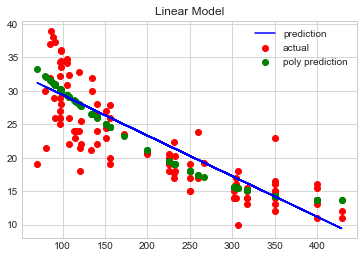

Linear Accuracy : 67.00
Polynomial Accuracy: 70.99


In [123]:
pp = m2.predict(p_features.fit_transform(xtest))
plt.title('Linear Model')
plt.scatter(xtest, ytest, color='r', label='actual')
plt.plot(xtest, pred1, color='b', label='prediction')
plt.scatter(xtest, pp, color='g', label='poly prediction')
plt.legend()
plt.show()
print(f"Linear Accuracy : {r2_score(ytest, pred1)*100:.2f}")
print(f"Polynomial Accuracy: {r2_score(ytest, pp)*100:.2f}")

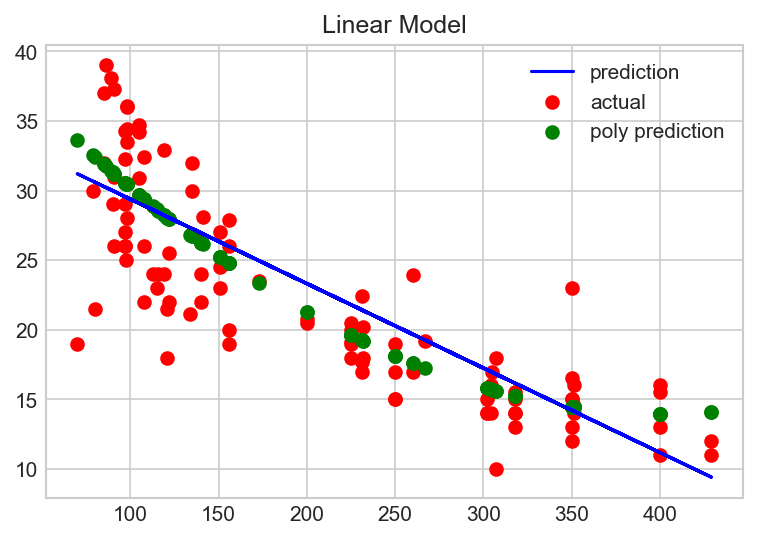

Linear Accuracy : 67.00
Polynomial Accuracy: 70.47


In [133]:
plt.figure(dpi=150)
f_t = PolynomialFeatures(degree=2)
m = LinearRegression()
m.fit(f_t.fit_transform(xtrain), ytrain)
pp = m.predict(f_t.fit_transform(xtest))
plt.title('Linear Model')
plt.scatter(xtest, ytest, color='r', label='actual')
plt.plot(xtest, pred1, color='b', label='prediction')
plt.scatter(xtest, pp, color='g', label='poly prediction')
plt.legend()
plt.show()
print(f"Linear Accuracy : {r2_score(ytest, pred1)*100:.2f}")
print(f"Polynomial Accuracy: {r2_score(ytest, pp)*100:.2f}")

x = [ 1, 2, 3, 4, 5, 6] 

a = 0.3, 0.4, 0.1

a+b*x+c*x**2

In [143]:
p = PolynomialFeatures(degree=5)

In [144]:
p.fit_transform(X).shape

(398, 6)

    sir whenever i am spliting data using train test split my accuracy is got changed why ? 

In [145]:
features

,displacement,horsepower,weight
0,307.0,130.0,3504
1,350.0,165.0,3693
2,318.0,150.0,3436
3,304.0,150.0,3433
4,302.0,140.0,3449
...,...,...,...
393,140.0,86.0,2790
394,97.0,52.0,2130
395,135.0,84.0,2295
396,120.0,79.0,2625


In [146]:
from sklearn.preprocessing import StandardScaler

In [147]:
sc = StandardScaler()

In [178]:
sc_features = sc.fit_transform(features)

In [150]:
m = PolynomialFeatures(degree=2)

In [179]:
poly_features = m.fit_transform(sc_features)

In [152]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, target)

In [153]:
X_train.shape

(298, 10)

In [154]:
X_train # 3 -> 10 ? 2deg -> X1, X2, X3 -> 3, 3, 3, 1

array([[ 1.        , -0.35938471, -0.32230928, ...,  0.10388327,
         0.14687784,  0.20766673],
       [ 1.        , -0.56103873, -0.53187283, ...,  0.28288871,
         0.42474542,  0.63773727],
       [ 1.        ,  1.04259084,  0.93507207, ...,  0.87435977,
         1.46331482,  2.44898078],
       ...,
       [ 1.        , -0.68587217, -0.47948195, ...,  0.22990294,
         0.32621559,  0.46287625],
       [ 1.        ,  1.5035143 ,  1.85191263, ...,  3.42958038,
         2.47331664,  1.7836862 ],
       [ 1.        ,  0.54325708,  0.14920873, ...,  0.02226324,
         0.11900596,  0.63613456]])

In [156]:
model = LinearRegression()

In [157]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [158]:
pred = model.predict(X_test)

In [163]:
print(f"Accuracy: {r2_score(y_test, pred)*100:.2f}")

Accuracy: 82.59


In [180]:
t_f = sc.transform(features)
p_f = m.transform(t_f)
p = model.predict(p_f)

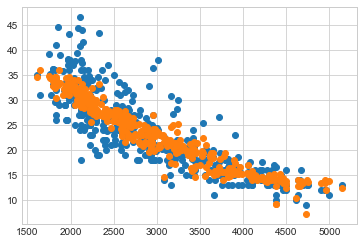

In [181]:
plt.scatter(features['weight'], target)
plt.scatter(features['weight'], p)
plt.show()

In [170]:
features.head()

,displacement,horsepower,weight
0,307.0,130.0,3504
1,350.0,165.0,3693
2,318.0,150.0,3436
3,304.0,150.0,3433
4,302.0,140.0,3449


In [173]:
ob = np.array([ [300, 150, 4000]])

In [183]:
sc.transform(ob) # scaling

array([[1.02338569, 1.19702651, 1.21731271]])

In [184]:
m.transform(sc.transform(ob))

array([[1.        , 1.02338569, 1.19702651, 1.21731271, 1.04731828,
        1.22501981, 1.24578041, 1.43287247, 1.45715559, 1.48185024]])

In [185]:
model.predict(m.transform(sc.transform(ob)))

array([14.71285915])

    fit -> training
    
    transform -> predict


    fit_transform -> training plus transformation in one shot

#### to study in regression

##### Gradient Descent 

###### L-2 Norm loss, Least Squares Error

###### multiple-Linear Regression  when you have more than one features

##### multi-varient Linear Regression when we have more than 1 targets to predict

### `Classification`

In [187]:
from tqdm import tqdm
from time import sleep

In [188]:
for _ in tqdm(range(600)):
    sleep(1)

100%|███████████████████████████████████████████████████████████████████████| 600/600 [10:00<00:00,  1.00s/it]


In [190]:
study_hours  = []
result = [ 'pass', 'fail']

`sigmoid or logit function` which produce `s-shape curve` such that values lie in 0-1, best for binary classification

$$ sigmoid = \frac {1} {1+e^{-z} }$$

$$Regression  \quad \quad \hat y \quad = \quad \beta_0 + \beta_1 X_1$$



$$ \text {logistic regression} = \frac {1} {1\quad+\quad e^{-(\beta_0+ \beta_1X_1)}} $$

In [191]:
data = np.linspace(-5, 5, 1000)

In [194]:
data = np.linspace(-5, 5, 1000)
sig = 1 / (1+np.exp(-data))

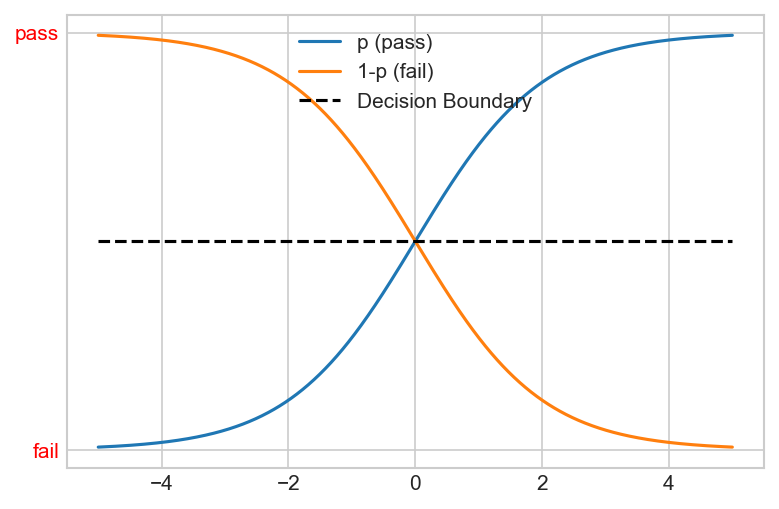

In [215]:
data = np.linspace(-5, 5, 1000)
sig = 1 / (1+np.exp(-data))
plt.figure(dpi=150)
plt.plot(data, sig, label='p (pass)')
plt.plot(data, 1-sig, label='1-p (fail)')
plt.yticks([0, 1], ['fail', 'pass'], color='red')
plt.plot([-5, 5],  [ 0.5, 0.5], 'k--', ms=10, label='Decision Boundary')
plt.legend(loc=9)
plt.show()

#### Logistic Regression (Classification)

In [220]:
h1 = np.random.normal(3, 2, 50)
h2 = np.random.normal(8, 2, 50)
hours = np.concatenate([h1, h2]).reshape(-1, 1)

In [221]:
hours.shape

(100, 1)

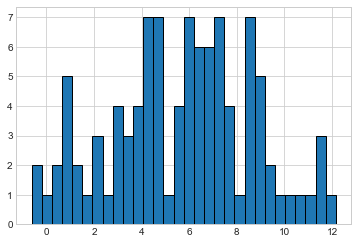

In [223]:
plt.hist(hours, bins=30, ec='k')
plt.show()

In [224]:
r1 = np.zeros(50)
r2 = np.ones(50)

In [225]:
result = np.concatenate([r1, r2])

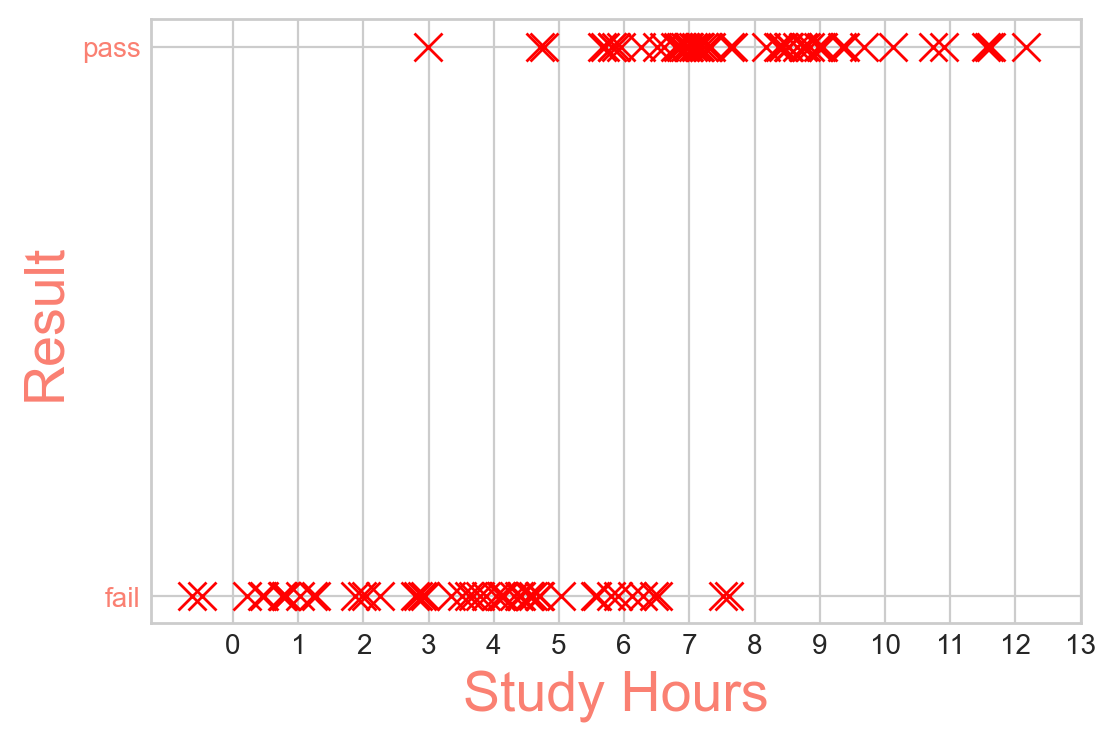

In [233]:
plt.figure(dpi=200)
plt.plot(hours, result, 'xr', ms=10)
plt.xlabel('Study Hours', color='salmon', fontsize=20)
plt.xticks(range(0, 14))
plt.ylabel('Result', color='salmon', fontsize=20)
plt.yticks([0, 1], ['fail', 'pass'], fontsize=10, color='salmon')
plt.show()

In [234]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [235]:
X_train, X_test, y_train, y_test = train_test_split(hours, result)

In [236]:
lin_model = LinearRegression()

In [237]:
log_model = LogisticRegression()

In [239]:
X_train[:5]

array([[4.60135315],
       [3.34326268],
       [4.7081605 ],
       [8.43083667],
       [6.11500051]])

In [240]:
y_train[:5]

array([0., 0., 1., 1., 0.])

In [241]:
lin_model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [242]:
log_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [243]:
pred1 = lin_model.predict(X_test)
pred2 = log_model.predict(X_test)

In [244]:
pred1[:5]

array([ 0.07604284,  0.90274998, -0.0748023 ,  0.54953133,  0.40382971])

In [245]:
pred2[:5]

array([0., 1., 0., 1., 0.])

In [247]:
y_test[:5]

array([0., 1., 0., 1., 0.])

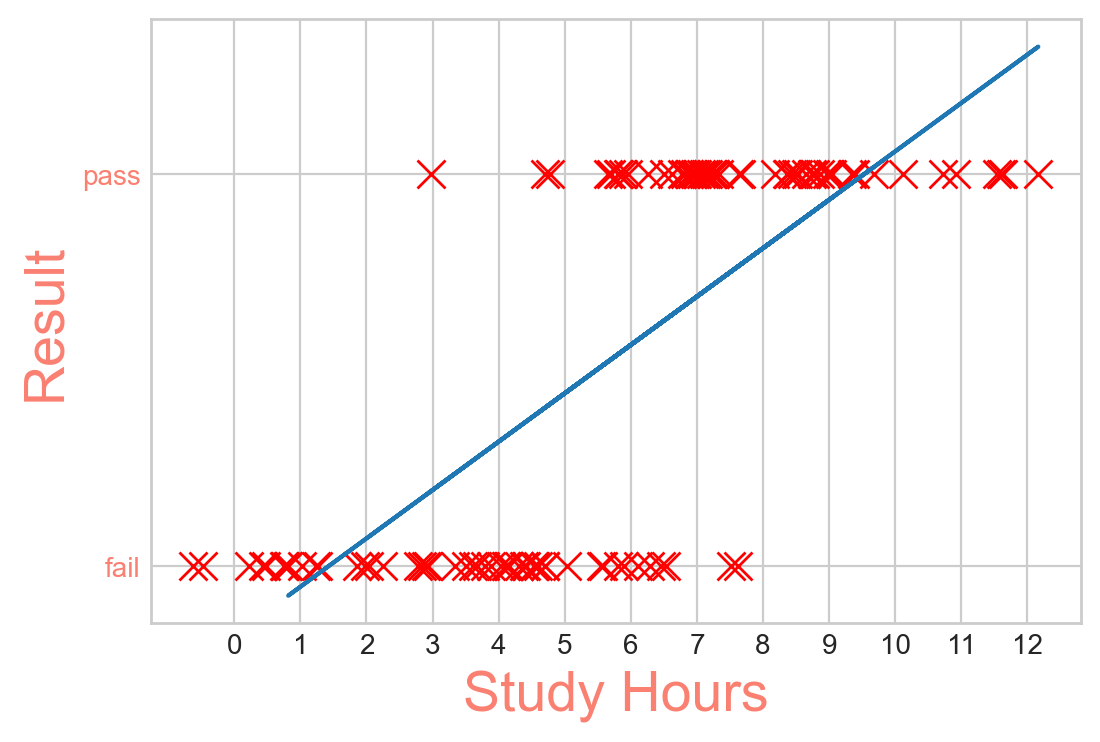

In [248]:
plt.figure(dpi=200)
plt.plot(hours, result, 'xr', ms=10)
plt.xlabel('Study Hours', color='salmon', fontsize=20)
plt.xticks(range(0, 14))
plt.ylabel('Result', color='salmon', fontsize=20)
plt.yticks([0, 1], ['fail', 'pass'], fontsize=10, color='salmon')
plt.plot(X_test, pred1)
plt.show()

In [253]:
lin = pred1.copy()

In [254]:

pred1[pred1 > 0.5] = 1
pred1[pred1 != 1 ] = 0

In [255]:
pred1[:5]

array([0., 1., 0., 1., 0.])

In [256]:
pred2[:5]

array([0., 1., 0., 1., 0.])

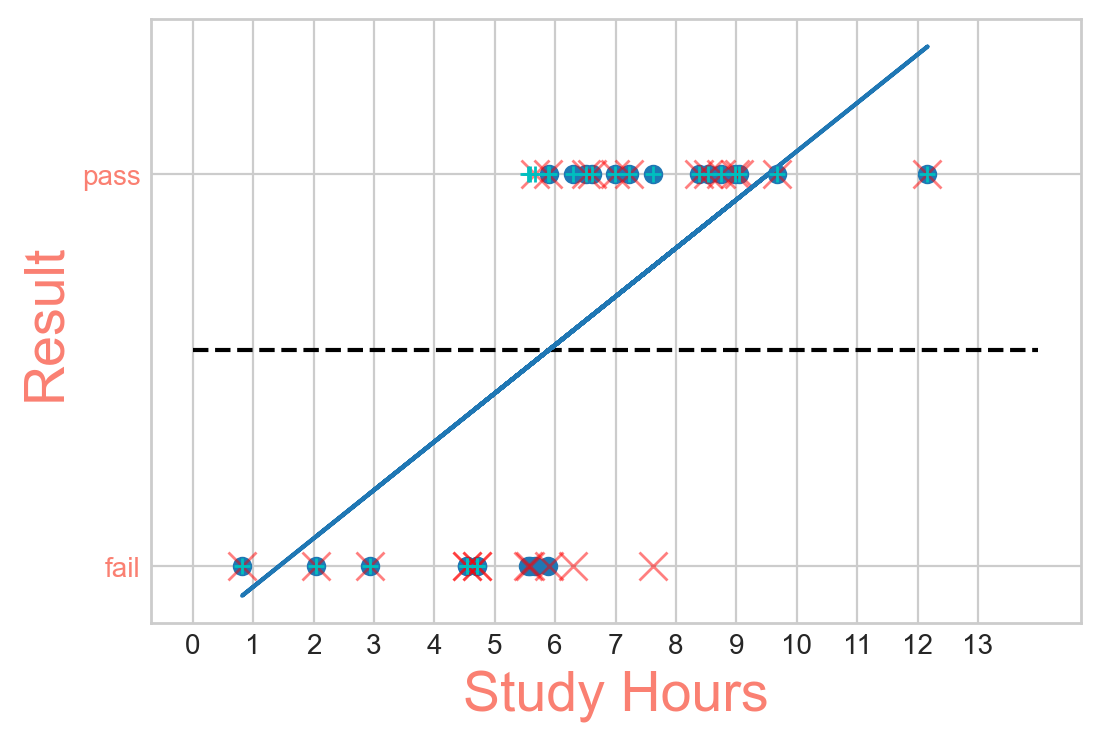

In [276]:
thresh_hold = 0.55
pred1 = lin_model.predict(X_test)
pred1[pred1 > thresh_hold] = 1
pred1[pred1 != 1 ] = 0
plt.figure(dpi=200)
plt.plot(X_test, y_test, 'xr', ms=10, alpha=0.5)
plt.xlabel('Study Hours', color='salmon', fontsize=20)
plt.xticks(range(0, 14))
plt.ylabel('Result', color='salmon', fontsize=20)
plt.yticks([0, 1], ['fail', 'pass'], fontsize=10, color='salmon')
plt.plot([0, 14], [thresh_hold, thresh_hold], 'k--')
plt.plot(X_test, lin)
plt.plot(X_test, pred2, 'c+')
plt.scatter(X_test, pred1)
plt.show()

In [277]:
prob = log_model.predict_proba(X_test)

In [278]:
prob.shape

(25, 2)

In [279]:
prob[:5]

array([[0.86088138, 0.13911862],
       [0.09896198, 0.90103802],
       [0.92812426, 0.07187574],
       [0.38075634, 0.61924366],
       [0.55581034, 0.44418966]])

In [280]:
p = prob[:, 1]

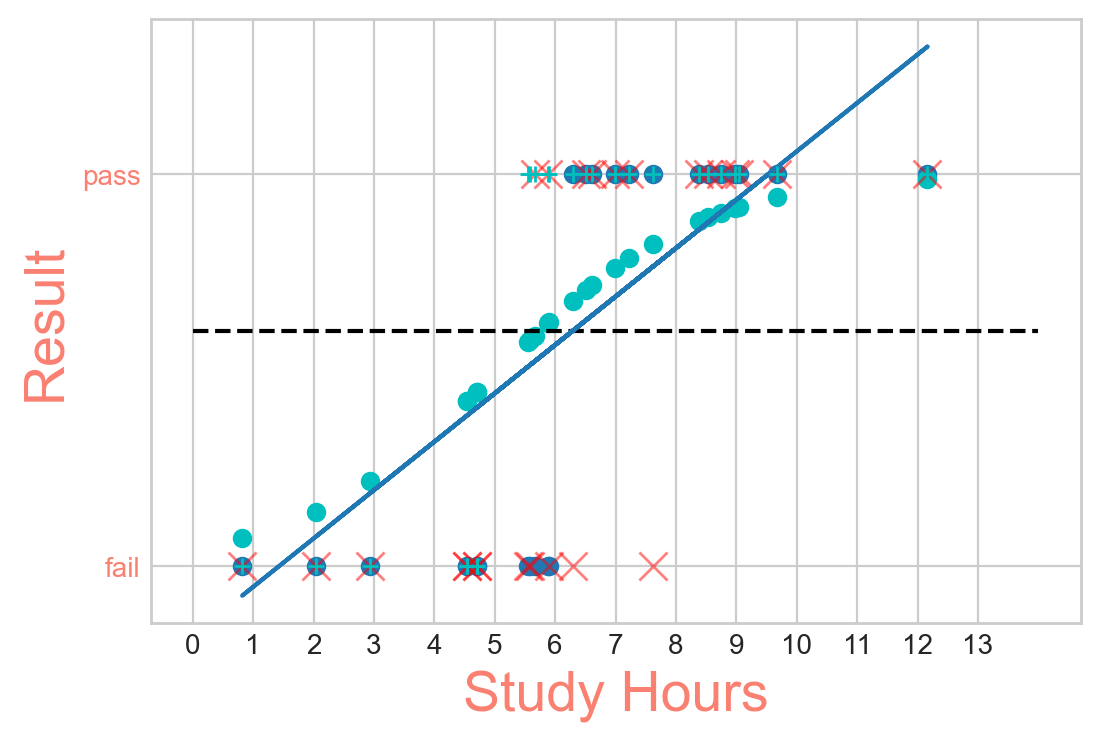

In [283]:
thresh_hold = 0.6
pred1 = lin_model.predict(X_test)
pred1[pred1 > thresh_hold] = 1
pred1[pred1 != 1 ] = 0
plt.figure(dpi=200)
plt.plot(X_test, y_test, 'xr', ms=10, alpha=0.5)
plt.xlabel('Study Hours', color='salmon', fontsize=20)
plt.xticks(range(0, 14))
plt.ylabel('Result', color='salmon', fontsize=20)
plt.yticks([0, 1], ['fail', 'pass'], fontsize=10, color='salmon')
plt.plot([0, 14], [thresh_hold, thresh_hold], 'k--')
plt.plot(X_test, lin)
plt.plot(X_test, pred2, 'c+')
plt.scatter(X_test, pred1)
plt.scatter(X_test, p, color='c')
plt.show()

In [284]:
h = [ [4], [5], [8], [0]]

In [285]:
log_model.predict(h)

array([0., 0., 1., 0.])

In [288]:
p = lin_model.predict(X_test)
r2_score(X_test, p)

-5.2716529052098045

In [289]:
r2_score(X_test, pred2)

-5.062262412222101

### Metrices of Classification 

__Confusion Matrix__

__Classification Report__

__Precision__

__Recall__

__f1 score__

__accuracy score__

__ROC & AUC__

### K-Nearest Neighbours

Homework - 

    predict type of breat cancer based on Logistic Regression

In [290]:
from sklearn.datasets import load_breast_cancer

In [291]:
data = load_breast_cancer()

In [292]:
df = pd.DataFrame( data['data'], columns=data['feature_names'])

In [293]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [294]:
target = data['target']

In [295]:
target[:5]

array([0, 0, 0, 0, 0])

In [296]:
data['target_names']

array(['malignant', 'benign'], dtype='<U9')